In [ ]:
!pip install geopandas fiona shapely pygeos pyproj

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 30.1 MB/s 
     |████████████████████████████████| 2.1 MB 50.8 MB/s 
     |████████████████████████████████| 6.3 MB 44.5 MB/s 


In [ ]:
# !pip uninstall rtree
# sudo apt install libspatialindex-dev
!pip install rtree

     |████████████████████████████████| 1.0 MB 5.2 MB/s 


In [ ]:
DIR = "/content/drive/MyDrive/College (Master)/Semester 1/COMP90024 - Cluster and Cloud Computing/Assignment/CCC Assignment 2 - 2022/Data Exploration"

In [ ]:
import fiona
import shapely
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
LOCATIONS = {}
LOCATIONS["west"] = [144.317,-38.000, 144.856, -37.166]
LOCATIONS["north"] = [144.856, -38.000, 145.185, -37.166]
LOCATIONS["east"] = [145.185, -38.000, 145.901, -37.166]
LOCATIONS["south"] = [144.655, -38.533, 145.901, -38.000]

# Read Data

In [ ]:
solar = pd.read_csv(DIR + '/abs_data_by_region_land_and_environment_asgs_sa2_2014_2018-2936901262497390773.csv')
motor_vehicle = pd.read_csv(DIR + '/sa2_g30_number_motor_vehicles_by_dwelling_census_2016-3183873885252962392.csv')

sa3_code_solar = list(solar[" sa2_maincode_2016"])
sa3_code_mh = list(motor_vehicle[" sa2_main16"])
sa3_code = sa3_code_solar + sa3_code_mh

print(sa3_code)
motor_vehicle

[206041125, 208021427, 208031183, 208031187, 207031162, 207031166, 212021454, 207031167, 206011106, 206031115, 213051466, 206041117, 206041118, 206041119, 206041120, 208011170, 206051129, 202021031, 203021043, 203031050, 203031051, 203031052, 203031053, 204011054, 204011056, 204011057, 204011060, 204011061, 204011062, 205011076, 205011077, 205011079, 205031087, 205031088, 205031089, 205031090, 205031091, 205031093, 208011171, 208021174, 213041360, 213041461, 208021426, 206051130, 208021178, 206051134, 201021009, 201021011, 206061135, 206061136, 206071140, 202021028, 202021030, 203021037, 203021038, 206011105, 203021039, 203021040, 203021041, 203021042, 203021044, 203021045, 203021046, 203021047, 203031048, 206011107, 206011108, 206011109, 206071141, 206021110, 206071142, 206021111, 206021112, 206041121, 206031113, 206031114, 206041122, 206041124, 206031116, 206041123, 206041126, 206041127, 206051128, 206051131, 206051132, 206051133, 206061137, 206061138, 206071143, 206071144, 206071145

,sa2_name16,num_mvs_ns,num_mvs_per_dweling_2_mvs,num_mvs_per_dweling_1_mvs,num_mvs_per_dweling_3_mvs,total_dwelings,sa2_main16,num_mvs_per_dweling_tot,num_mvs_per_dweling_0_mvs,num_mvs_per_dweling_4mo_mvs
0,Cranbourne North,182,2836,1497,924,5956,212031302,5773,111,416
1,Cranbourne South,76,1178,475,512,2773,212031303,2693,49,480
2,Cranbourne West,146,2239,1279,657,4635,212031304,4486,80,234
3,Prahran - Windsor,290,1860,4537,307,8983,206061136,8693,1916,81
4,Collingwood,189,531,1787,85,3729,206071141,3545,1114,22
...,...,...,...,...,...,...,...,...,...,...
332,Mount Eliza,145,2824,1338,1008,5951,214021381,5805,121,516
333,Mount Martha,186,3014,1725,895,6385,214021382,6207,129,431
334,Point Nepean,333,2737,2371,710,6696,214021383,6365,254,297
335,Rosebud - McCrae,494,2992,3534,786,8727,214021384,8229,595,317


In [ ]:
# List down all layers
for layername in fiona.listlayers(DIR + '/asgs2016.gpkg'):
    print("===============%s==============" % (layername))
    geopkg = gpd.read_file(DIR + '/asgs2016.gpkg', layer=layername)
    i = 0
    for name in geopkg.columns:
        print(name)
        i += 1

===============australia_2016==============
AUS_CODE_2016
AUS_NAME_2016
geometry
===============greater_capital_city_statistical_area_2016==============
GCCSA_CODE_2016
GCCSA_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============state_2016==============
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_1_2016==============
SA1_MAINCODE_2016
SA1_7DIGITCODE_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_2_2016==============
SA2_MAINCODE_2016
SA2_5DIGITCODE_2016
SA2_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_3_2016==============
SA3_CODE_2016
SA3_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_4_2016==============
SA4_CODE_2016
SA4_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============mesh_block_2016==============
MB_CODE_2016
ADD_CODE_2016
ADD_NAME_2016
AUS_CODE_2016
AUS_NAME_2016
CED_CODE_2016
CED_NAME_2016
DZN_CODE_2016
DZN_NAME_2016
G

In [ ]:
geopkg = gpd.read_file(DIR + '/asgs2016.gpkg', layer="statistical_area_level_2_2016")
geopkg.columns

Index(['SA2_MAINCODE_2016', 'SA2_5DIGITCODE_2016', 'SA2_NAME_2016',
       'STE_CODE_2016', 'STE_NAME_2016', 'geometry'],
      dtype='object')

In [ ]:
geopkg

,SA2_MAINCODE_2016,SA2_5DIGITCODE_2016,SA2_NAME_2016,STE_CODE_2016,STE_NAME_2016,geometry
0,511041285,51285,Geraldton,5,Western Australia,"MULTIPOLYGON (((114.61257 -28.76629, 114.61253..."
1,511041287,51287,Geraldton - North,5,Western Australia,"MULTIPOLYGON (((114.60914 -28.67761, 114.60868..."
2,511041288,51288,Geraldton - South,5,Western Australia,"MULTIPOLYGON (((114.60857 -28.79258, 114.61024..."
3,901021002,91002,Cocos (Keeling) Islands,9,Other Territories,"MULTIPOLYGON (((96.81703 -12.14427, 96.81703 -..."
4,901011001,91001,Christmas Island,9,Other Territories,"MULTIPOLYGON (((105.67392 -10.41567, 105.67381..."
...,...,...,...,...,...,...
2305,799999499,79499,No usual address (NT),7,Northern Territory,None
2306,897979799,89799,Migratory - Offshore - Shipping (ACT),8,Australian Capital Territory,None
2307,899999499,89499,No usual address (ACT),8,Australian Capital Territory,None
2308,997979799,99799,Migratory - Offshore - Shipping (OT),9,Other Territories,None


In [ ]:
geopkg["SA2_MAINCODE_2016"][0]

'511041285'

In [ ]:
sa3_code[0]

206041125

In [ ]:
geometry_list = {}

for code in sa3_code:
    # print(geopkg[geopkg.SA3_CODE_2016 == str(code)]["geometry"].values)
    geometry_list[str(code)] = geopkg[geopkg.SA2_MAINCODE_2016 == str(code)]["geometry"].values

In [ ]:
geometry_list

{'201021009': <GeometryArray>
 Length: 1, dtype: geometry, '201021011': <GeometryArray>
 Length: 1, dtype: geometry, '202021028': <GeometryArray>
 Length: 1, dtype: geometry, '202021030': <GeometryArray>
 Length: 1, dtype: geometry, '202021031': <GeometryArray>
 Length: 1, dtype: geometry, '203021037': <GeometryArray>
 Length: 1, dtype: geometry, '203021038': <GeometryArray>
 Length: 1, dtype: geometry, '203021039': <GeometryArray>
 Length: 1, dtype: geometry, '203021040': <GeometryArray>
 Length: 1, dtype: geometry, '203021041': <GeometryArray>
 Length: 1, dtype: geometry, '203021042': <GeometryArray>
 Length: 1, dtype: geometry, '203021043': <GeometryArray>
 Length: 1, dtype: geometry, '203021044': <GeometryArray>
 Length: 1, dtype: geometry, '203021045': <GeometryArray>
 Length: 1, dtype: geometry, '203021046': <GeometryArray>
 Length: 1, dtype: geometry, '203021047': <GeometryArray>
 Length: 1, dtype: geometry, '203031048': <GeometryArray>
 Length: 1, dtype: geometry, '203031050': 

# Classify each code to directions

## Generate points in bounding boxes

In [ ]:
from shapely.geometry import Polygon, LineString, Point

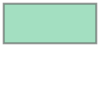

In [ ]:
new_directions = {}

for direction, coord in LOCATIONS.items():
    lon1 = coord[0]
    lat1 = coord[1]

    lon2 = coord[2]
    lat2 = coord[3]

    points = []
    points.append((lon1, lat1))
    points.append((lon2, lat1))
    points.append((lon2, lat2))
    points.append((lon1, lat2))
    polygons = Polygon(points)
    new_directions[direction] = polygons

new_directions['south']

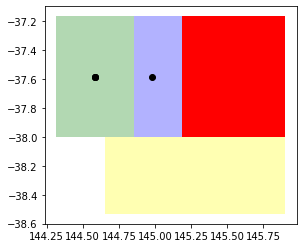

In [ ]:
polys1 = gpd.GeoSeries(new_directions['east'])
polys2 = gpd.GeoSeries(new_directions['west'])
polys3 = gpd.GeoSeries(new_directions['north'])
polys4 = gpd.GeoSeries(new_directions['south'])

df1 = gpd.GeoDataFrame({'geometry': polys1})
df2 = gpd.GeoDataFrame({'geometry': polys2})
df3 = gpd.GeoDataFrame({'geometry': polys3})
df4 = gpd.GeoDataFrame({'geometry': polys4})

centre_point1 = gpd.GeoSeries(Point([(144.586, -37.589)]))
centre_point2 = gpd.GeoSeries(Point([(144.981, -37.589)]))
centre_point3 = gpd.GeoSeries(Point([(144.586, -37.589)]))
centre_point4 = gpd.GeoSeries(Point([(144.586, -37.589)]))

centre1 = gpd.GeoDataFrame({'geometry': centre_point1})
centre2 = gpd.GeoDataFrame({'geometry': centre_point2})
centre3 = gpd.GeoDataFrame({'geometry': centre_point3})
centre4 = gpd.GeoDataFrame({'geometry': centre_point4})

ax = df1.plot(color='red')
df2.plot(ax=ax, color='green', alpha=0.3)
df3.plot(ax=ax, color='blue', alpha=0.3)
df4.plot(ax=ax, color='yellow', alpha=0.3)
centre1.plot(ax=ax, color='black')
centre2.plot(ax=ax, color='black')
centre3.plot(ax=ax, color='black')
centre4.plot(ax=ax, color='black')

In [ ]:
df_locations = \
{
    'east': df1,
    'west': df2,
    'north': df3,
    'south': df4
}

## Check intersection

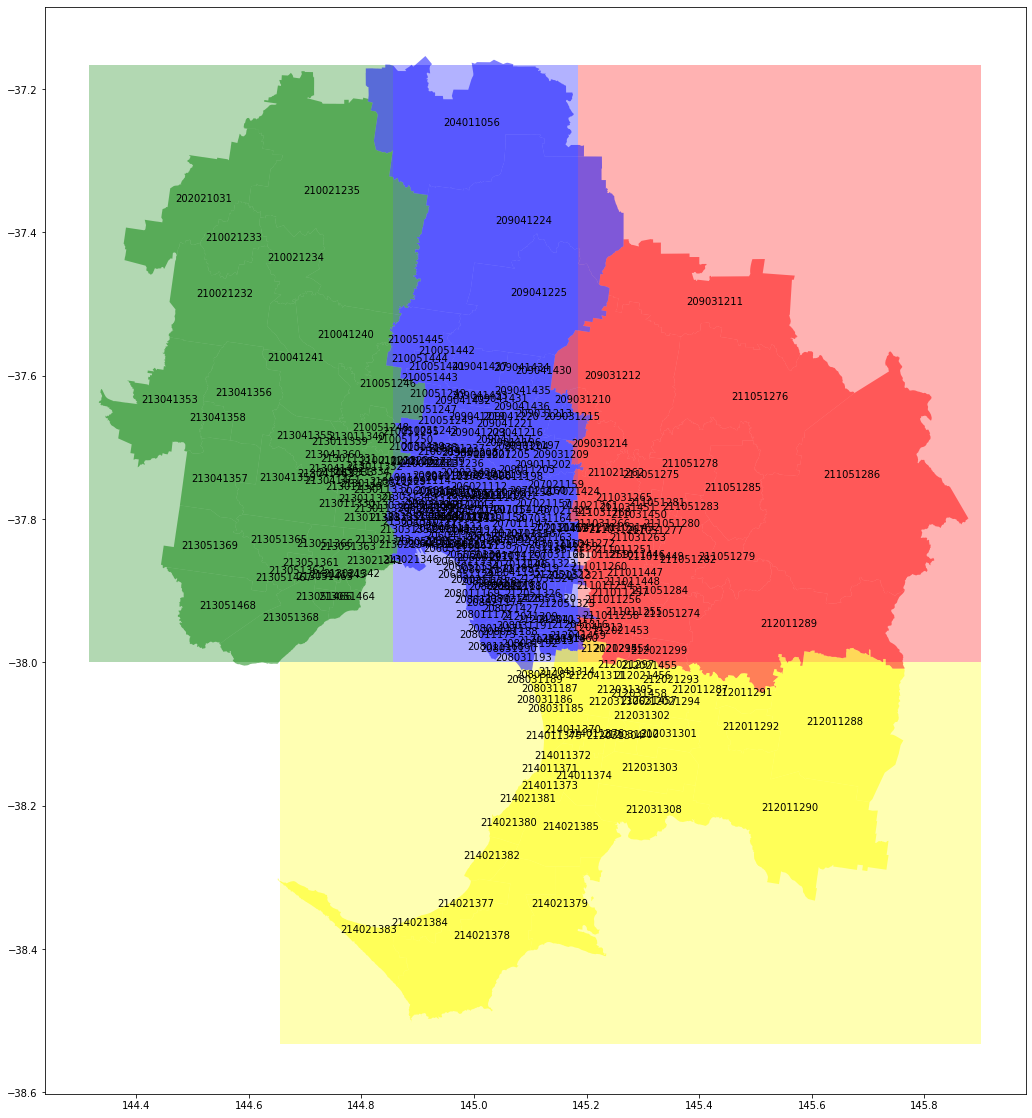

In [ ]:
areas_classification = {'west': [], 'east': [], 'north': [], 'south': []}
color_classification = {'west': "green", 'east': "red", 'north': "blue", 'south': "yellow"}
classified = []
excluded = ['204011062', 
            '205031089',
            '205031091',
            '205031088',
            '203031051',
            '202021030',
            '205011076']

ax = df1.plot(color='red', alpha=0.3, figsize=(30,20))
df2.plot(ax=ax, color='green', alpha=0.3)
df3.plot(ax=ax, color='blue', alpha=0.3)
df4.plot(ax=ax, color='yellow', alpha=0.3)

for key, poly in geometry_list.items():
    if key not in classified and key not in excluded:
        max = 0
        max_dir = ""
        for direction, poly_dir in df_locations.items():
            polys_df = gpd.GeoDataFrame({'geometry': poly})
            intersection = polys_df.overlay(poly_dir, how='intersection')
            if intersection.values:
                if intersection.area.values[0] / polys_df.area.values[0] >= 0.6:
                    if intersection.area.values[0] > max:
                        max = intersection.area.values[0]
                        max_dir = direction

        if max_dir != "":
            areas_classification[max_dir].append(key)

            # Plot
            polys_df['coords'] = polys_df['geometry'].apply(lambda x: x.representative_point().coords[:])
            polys_df['coords'] = [coords[0] for coords in polys_df['coords']]
            polys_df.plot(ax=ax, color=color_classification[max_dir], alpha=0.5)

            for idx, row in polys_df.iterrows():
                plt.annotate(s=key, xy=row['coords'],
                            horizontalalignment='center')
        
        classified.append(key)

In [ ]:
# Embed the classification in dataframe for easy aggregation
motor_vehicle['area_classification'] = "outer"
solar['area_classification'] = "outer"

for direction, code_list in areas_classification.items():
    for code in code_list:
        sa3_code_solar = list(solar[" sa2_maincode_2016"])
        sa3_code_mh = list(motor_vehicle[" sa2_main16"])

        motor_vehicle.loc[motor_vehicle[' sa2_main16'] == int(code), 'area_classification'] = direction
        solar.loc[solar[' sa2_maincode_2016'] == int(code), 'area_classification'] = direction

In [ ]:
solar['area_classification'].value_counts()

north    168
west      49
east      48
south     43
outer     37
Name: area_classification, dtype: int64

In [ ]:
motor_vehicle['area_classification'].value_counts()

north    168
west      49
east      48
south     43
outer     29
Name: area_classification, dtype: int64

# Analyze AURIN Data

## Basic summarization solar

In [ ]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 24 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   protected_areas_year_ended_30_june_all_other_protected_areas_ha   107 non-null    float64
 1    protected_areas_year_ended_30_june_protected_areas_num           110 non-null    float64
 2    land_area_land_area_ha                                           345 non-null    float64
 3    slr_instlltns_accmltve_ttl_2001_incrse_wtr_htr_frm_prvs_yr_pc    325 non-null    float64
 4    protected_areas_year_ended_30_june_national_parks_pc             31 non-null     float64
 5    sa2_maincode_2016                                                345 non-null    int64  
 6    protected_areas_year_ended_30_june_indigenous_protected_area_ha  0 non-null      float64
 7    protected_areas_year_ended_30_june

In [ ]:
solar.head()

,protected_areas_year_ended_30_june_all_other_protected_areas_ha,protected_areas_year_ended_30_june_protected_areas_num,land_area_land_area_ha,slr_instlltns_accmltve_ttl_2001_incrse_wtr_htr_frm_prvs_yr_pc,protected_areas_year_ended_30_june_national_parks_pc,sa2_maincode_2016,protected_areas_year_ended_30_june_indigenous_protected_area_ha,protected_areas_year_ended_30_june_protected_areas_total_pc,protected_areas_year_ended_30_june_nature_reserves_pc,protected_areas_year_ended_30_june_nature_reserves_num,...,protected_areas_year_ended_30_june_protected_areas_total_num,yr,protected_areas_year_ended_30_june_all_other_protected_areas_pc,solar_installations_accumulative_total_2001_water_heater_num,protected_areas_year_ended_30_june_protected_areas_total_ha,protected_areas_year_ended_30_june_national_parks_ha,slr_instlltns_accmltve_ttl_2001_incrse_pnl_frm_prvs_yr_pc,protected_areas_year_ended_30_june_indigenous_area_num,protected_areas_year_ended_30_june_nature_reserves_ha,area_classification
0,NaN,NaN,150.3,NaN,NaN,206041125,NaN,NaN,NaN,NaN,...,NaN,2018,NaN,17.0,NaN,NaN,12.5,NaN,NaN,north
1,NaN,NaN,458.8,17.9,NaN,208021427,NaN,NaN,NaN,NaN,...,NaN,2018,NaN,540.0,NaN,NaN,12.6,NaN,NaN,north
2,NaN,NaN,530.7,12.4,NaN,208031183,NaN,NaN,NaN,NaN,...,NaN,2018,NaN,190.0,NaN,NaN,14.5,NaN,NaN,south
3,NaN,NaN,319.6,11.0,NaN,208031187,NaN,NaN,NaN,NaN,...,NaN,2018,NaN,121.0,NaN,NaN,10.2,NaN,NaN,south
4,NaN,NaN,359.7,9.7,NaN,207031162,NaN,NaN,NaN,NaN,...,NaN,2018,NaN,261.0,NaN,NaN,10.0,NaN,NaN,north


In [ ]:
solar.describe()

,protected_areas_year_ended_30_june_all_other_protected_areas_ha,protected_areas_year_ended_30_june_protected_areas_num,land_area_land_area_ha,slr_instlltns_accmltve_ttl_2001_incrse_wtr_htr_frm_prvs_yr_pc,protected_areas_year_ended_30_june_national_parks_pc,sa2_maincode_2016,protected_areas_year_ended_30_june_indigenous_protected_area_ha,protected_areas_year_ended_30_june_protected_areas_total_pc,protected_areas_year_ended_30_june_nature_reserves_pc,protected_areas_year_ended_30_june_nature_reserves_num,...,protected_areas_year_ended_30_june_national_parks_num,protected_areas_year_ended_30_june_protected_areas_total_num,yr,protected_areas_year_ended_30_june_all_other_protected_areas_pc,solar_installations_accumulative_total_2001_water_heater_num,protected_areas_year_ended_30_june_protected_areas_total_ha,protected_areas_year_ended_30_june_national_parks_ha,slr_instlltns_accmltve_ttl_2001_incrse_pnl_frm_prvs_yr_pc,protected_areas_year_ended_30_june_indigenous_area_num,protected_areas_year_ended_30_june_nature_reserves_ha
count,107.000000,110.000000,345.000000,325.000000,31.000000,3.450000e+02,0.0,112.000000,0.0,0.0,...,32.00000,114.000000,345.0,106.000000,338.000000,112.000000,32.000000,339.000000,0.0,0.0
mean,582.859813,9.645455,9709.123478,9.426769,14.248387,2.093695e+08,NaN,6.967857,NaN,NaN,...,1.65625,9.771930,2018.0,3.196226,640.319527,2817.151786,7911.000000,13.845133,NaN,NaN
std,1251.721377,15.046464,34842.132729,7.433461,14.934878,3.118154e+06,NaN,10.371037,NaN,NaN,...,1.38213,15.297079,0.0,4.308572,859.795724,8295.119015,12382.253894,5.707832,NaN,NaN
min,1.000000,1.000000,126.700000,0.900000,0.200000,2.010210e+08,NaN,0.100000,NaN,NaN,...,1.00000,1.000000,2018.0,0.100000,3.000000,1.000000,2.000000,1.200000,NaN,NaN
25%,23.500000,1.000000,493.000000,4.700000,3.600000,2.070112e+08,NaN,0.600000,NaN,NaN,...,1.00000,1.000000,2018.0,0.600000,191.500000,21.750000,270.500000,11.250000,NaN,NaN
50%,142.000000,4.000000,860.800000,8.000000,10.300000,2.100212e+08,NaN,2.700000,NaN,NaN,...,1.00000,4.000000,2018.0,1.700000,323.500000,159.000000,3038.000000,12.700000,NaN,NaN
75%,451.000000,10.750000,2420.200000,12.500000,17.450000,2.120313e+08,NaN,8.925000,NaN,NaN,...,2.00000,10.000000,2018.0,3.575000,665.500000,1238.250000,10040.500000,15.150000,NaN,NaN
max,8131.000000,83.000000,392787.700000,66.300000,60.400000,2.140214e+08,NaN,61.400000,NaN,NaN,...,6.00000,83.000000,2018.0,20.600000,6536.000000,59000.000000,50869.000000,75.600000,NaN,NaN


## Basic summarization motor vehicle

In [ ]:
motor_vehicle.head()

,sa2_name16,num_mvs_ns,num_mvs_per_dweling_2_mvs,num_mvs_per_dweling_1_mvs,num_mvs_per_dweling_3_mvs,total_dwelings,sa2_main16,num_mvs_per_dweling_tot,num_mvs_per_dweling_0_mvs,num_mvs_per_dweling_4mo_mvs,area_classification
0,Cranbourne North,182,2836,1497,924,5956,212031302,5773,111,416,south
1,Cranbourne South,76,1178,475,512,2773,212031303,2693,49,480,south
2,Cranbourne West,146,2239,1279,657,4635,212031304,4486,80,234,south
3,Prahran - Windsor,290,1860,4537,307,8983,206061136,8693,1916,81,north
4,Collingwood,189,531,1787,85,3729,206071141,3545,1114,22,north


In [ ]:
motor_vehicle.describe()

,num_mvs_ns,num_mvs_per_dweling_2_mvs,num_mvs_per_dweling_1_mvs,num_mvs_per_dweling_3_mvs,total_dwelings,sa2_main16,num_mvs_per_dweling_tot,num_mvs_per_dweling_0_mvs,num_mvs_per_dweling_4mo_mvs
count,337.00000,337.000000,337.000000,337.000000,337.000000,3.370000e+02,337.000000,337.000000,337.000000
mean,164.00000,1861.531157,1756.000000,561.685460,5066.163205,2.094787e+08,4901.946588,428.442136,294.249258
std,103.06303,880.644985,1062.748822,285.679405,2409.504796,3.071458e+06,2324.009908,809.598907,176.724926
min,0.00000,0.000000,0.000000,0.000000,0.000000,2.010210e+08,0.000000,0.000000,0.000000
25%,93.00000,1179.000000,1028.000000,355.000000,3386.000000,2.070214e+08,3294.000000,112.000000,159.000000
50%,144.00000,1837.000000,1621.000000,545.000000,4792.000000,2.100312e+08,4644.000000,248.000000,282.000000
75%,208.00000,2492.000000,2361.000000,755.000000,6594.000000,2.120315e+08,6365.000000,493.000000,401.000000
max,717.00000,4550.000000,6502.000000,1357.000000,16284.000000,2.140214e+08,15565.000000,11725.000000,898.000000


## Analysis per area

In [ ]:
analysis = {}

for dir in ['north', 'south', 'west', 'east']:
    analysis[dir] = {}
    dir_solar = solar[solar.area_classification == dir]
    dir_mv = motor_vehicle[motor_vehicle.area_classification == dir]

    # Solar analysis
    analysis[dir]['solar'] = {}
    analysis[dir]['solar']['total_solar_installation'] = dir_solar[' slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm'].sum()
    analysis[dir]['solar']['avg_solar_installation'] = dir_solar[' slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm'].mean()

    analysis[dir]['solar']['perha_solar_installation'] = dir_solar[' slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm'].sum() / dir_solar[' land_area_land_area_ha'].sum()


    # Motor Vehicle analysis
    analysis[dir]['motor_vehicle'] = {}
    analysis[dir]['motor_vehicle']['total_dwelings'] = dir_mv[' total_dwelings'].sum()
    analysis[dir]['motor_vehicle']['avg_dwelings'] = dir_mv[' total_dwelings'].mean()

    analysis[dir]['motor_vehicle']['total_dwelings_with_mv'] = dir_mv[' num_mvs_per_dweling_tot'].sum()
    analysis[dir]['motor_vehicle']['avg_dwelings_with_mv'] = dir_mv[' num_mvs_per_dweling_tot'].mean()

    analysis[dir]['motor_vehicle']['ratio_dwelings_with_mv'] = dir_mv[' num_mvs_per_dweling_tot'].sum() / dir_mv[' total_dwelings'].sum()

In [ ]:
analysis

{'east': {'motor_vehicle': {'avg_dwelings': 4145.208333333333,
   'avg_dwelings_with_mv': 4028.5208333333335,
   'ratio_dwelings_with_mv': 0.9718500276423582,
   'total_dwelings': 198970,
   'total_dwelings_with_mv': 193369},
  'solar': {'avg_solar_installation': 762.875,
   'perha_solar_installation': 0.12271168083301048,
   'total_solar_installation': 36618.0}},
 'north': {'motor_vehicle': {'avg_dwelings': 5336.547619047619,
   'avg_dwelings_with_mv': 5168.702380952381,
   'ratio_dwelings_with_mv': 0.9685479733196511,
   'total_dwelings': 896540,
   'total_dwelings_with_mv': 868342},
  'solar': {'avg_solar_installation': 587.680981595092,
   'perha_solar_installation': 0.3913794540495222,
   'total_solar_installation': 95792.0}},
 'south': {'motor_vehicle': {'avg_dwelings': 5773.511627906977,
   'avg_dwelings_with_mv': 5570.558139534884,
   'ratio_dwelings_with_mv': 0.9648474790643717,
   'total_dwelings': 248261,
   'total_dwelings_with_mv': 239534},
  'solar': {'avg_solar_installat

In [ ]:
analysis_result = {
    'result': analysis,
    'description': {
        'avg_dwelings': 'Average number of dwelings',
        'avg_dwelings_with_mv': 'Average number of dwelings with at least one motor vehicle',
        'ratio_dwelings_with_mv': 'Ratio number of dwelings with at least one motor vehicle per total dwelings',
        'total_dwelings': 'Total number of dwelings',
        'total_dwelings_with_mv': 'Total number of dwelings with at least one motor vehicle',
        'avg_solar_installation': 'Average number of solar installation',
        'perha_solar_installation': 'Ratio number of solar installation per hectare',
        'total_solar_installation': 'Total number of solar installation'
    }
}

analysis_result

{'description': {'avg_dwelings': 'Average number of dwelings',
  'avg_dwelings_with_mv': 'Average number of dwelings with at least one motor vehicle',
  'avg_solar_installation': 'Average number of solar installation',
  'perha_solar_installation': 'Ratio number of solar installation per hectare',
  'ratio_dwelings_with_mv': 'Ratio number of dwelings with at least one motor vehicle per total dwelings',
  'total_dwelings': 'Total number of dwelings',
  'total_dwelings_with_mv': 'Total number of dwelings with at least one motor vehicle',
  'total_solar_installation': 'Total number of solar installation'},
 'result': {'east': {'motor_vehicle': {'avg_dwelings': 4145.208333333333,
    'avg_dwelings_with_mv': 4028.5208333333335,
    'ratio_dwelings_with_mv': 0.9718500276423582,
    'total_dwelings': 198970,
    'total_dwelings_with_mv': 193369},
   'solar': {'avg_solar_installation': 762.875,
    'perha_solar_installation': 0.12271168083301048,
    'total_solar_installation': 36618.0}},
  'n

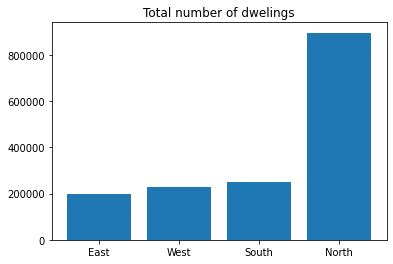

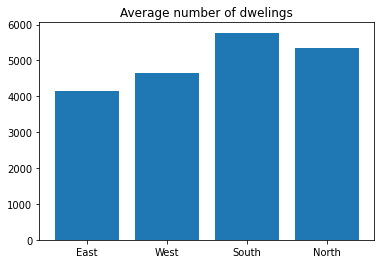

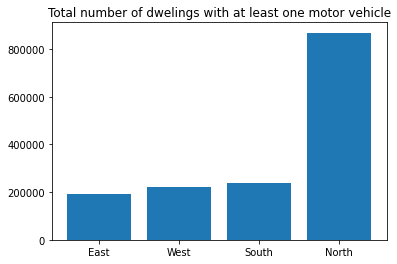

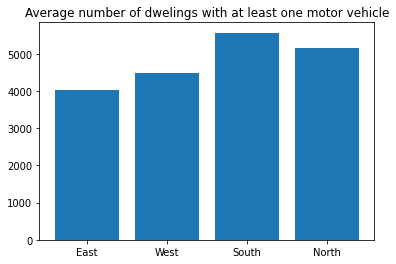

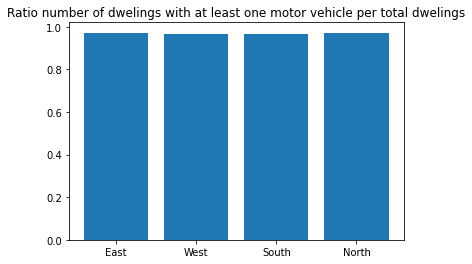

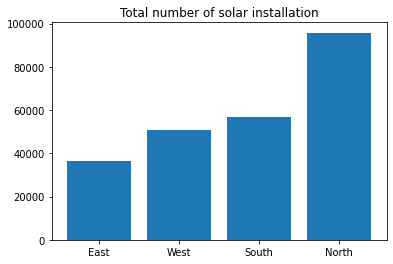

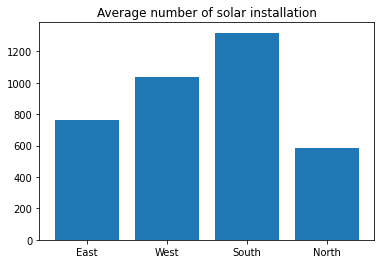

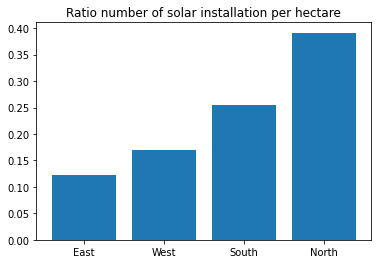

In [ ]:
for type_analysis in ['motor_vehicle', 'solar']:
    for analysis_aspect in analysis['east'][type_analysis].keys():
        x = ['East', 'West', 'South', 'North']
        y = [analysis['east'][type_analysis][analysis_aspect],
             analysis['west'][type_analysis][analysis_aspect],
             analysis['south'][type_analysis][analysis_aspect],
             analysis['north'][type_analysis][analysis_aspect]]

        plt.bar(x, y)
        plt.title(analysis_result['description'][analysis_aspect])
        plt.show()

In [ ]:
import json

with open(DIR + 'AURIN_result.json', 'w+') as f:
    json_str = json.dumps(analysis_result)
    json.dump(json_str, f)

TypeError: ignored

In [ ]:
json.dumps(analysis)

TypeError: ignored